In [1]:
# importing the necessary libraries for data manipulation and visualization
import pandas as pd                  # pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt      # matplotlib is used for creating static, animated, and interactive visualizations
from mplsoccer import VerticalPitch  # mplsoccer is a library for football data visualization, particularly for plotting football pitches, allows create a footbal pitch 

In [2]:
# reading the player CSV file into a pandas DataFrame
df = pd.read_csv('Mohamed Salah 2024.csv')

In [3]:
# display the first few rows of the dataframe
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,584693,46,BlockedShot,0.874,0.338,0.040268,Mohamed Salah,a,1250,FromCorner,2024,LeftFoot,26603,Ipswich,Liverpool,0,2,17/08/2024 11:30,Luis Díaz,Pass
1,584700,64,Goal,0.937,0.449,0.571324,Mohamed Salah,a,1250,OpenPlay,2024,LeftFoot,26603,Ipswich,Liverpool,0,2,17/08/2024 11:30,NaN,None
2,584702,70,SavedShot,0.837,0.563,0.403200,Mohamed Salah,a,1250,OpenPlay,2024,LeftFoot,26603,Ipswich,Liverpool,0,2,17/08/2024 11:30,Dominik Szoboszlai,Throughball
3,584707,93,SavedShot,0.931,0.347,0.081943,Mohamed Salah,a,1250,OpenPlay,2024,LeftFoot,26603,Ipswich,Liverpool,0,2,17/08/2024 11:30,NaN,None
4,586849,20,MissedShots,0.882,0.314,0.064414,Mohamed Salah,h,1250,OpenPlay,2024,LeftFoot,26621,Liverpool,Brentford,2,0,25/08/2024 15:30,Trent Alexander-Arnold,Pass


In [4]:
# the X and Y coordinates are scaled between 0 and 1
# to align with the mplsoccer pitch dimensions, which range from 0 to 100, we scale the coordinates by multiplying them by 100
df['X'] = df['X'] * 100  
df['Y'] = df['Y'] * 100  

In [5]:
# calculate the statistics we'll need to display

# 1. total number of shots (rows in the dataframe)
total_shots = df.shape[0]

# 2. total number of goals (where the result column indicates 'Goal')
total_goals = df[df['result'] == 'Goal'].shape[0]

# 3. total expected goals (xG) summed across all shots
total_xG = df['xG'].sum()

# 4. xG per shot (average xG value for all shots)
xG_per_shot = total_xG / total_shots

# 5. average distance of shots
# here, we calculate the average X coordinate (horizontal distance) for all shots
points_average_distance = df['X'].mean()

# actual average shot distance: adjust for the full football field length of 105m
# football field (105 m) long by (68 m) wide 
# 105 meters is the standard football pitch length, so we account for scaling
actual_average_distance = 105 - (df['X'] * 1.05).mean()  # adjusting based on the field length scaling factor


# filter the dataframe for shots with LeftFoot and RightFoot shot types
leftfoot_shots = df[df['shotType'] == 'LeftFoot']  # filter rows where the shot type is 'LeftFoot'
rightfoot_shots = df[df['shotType'] == 'RightFoot']  # filter rows where the shot type is 'RightFoot'

# calculate stats for LeftFoot shots
leftfoot_total_shots = leftfoot_shots.shape[0]  # total number of LeftFoot shots

# calculate stats for RightFoot shots
rightfoot_total_shots = rightfoot_shots.shape[0]  # total number of RightFoot shots

# output the calculated average distances
print(points_average_distance, actual_average_distance)  # print the average shot distances

88.86808451276598 11.688511261595735


In [6]:
# define the background color for the plot
# color hex #0C0D0E  - very dark (mostly black) 
# football field color #4CAF50 - dark moderate lime green

# define background color for the entire figure
background_color = '#0C0D0E'

# define a different background color for the football pitch
football_pitch_background = '#4CAF50'

In [7]:
# initialize the pitch
pitch = VerticalPitch(
    pitch_type='opta',                      # opta pitch type
    half=True,                              # half-pitch view
    pitch_color=football_pitch_background,  # color of the pitch background
    line_color='white',                     # color of the pitch lines
    linewidth=1.2,                          # line width
)

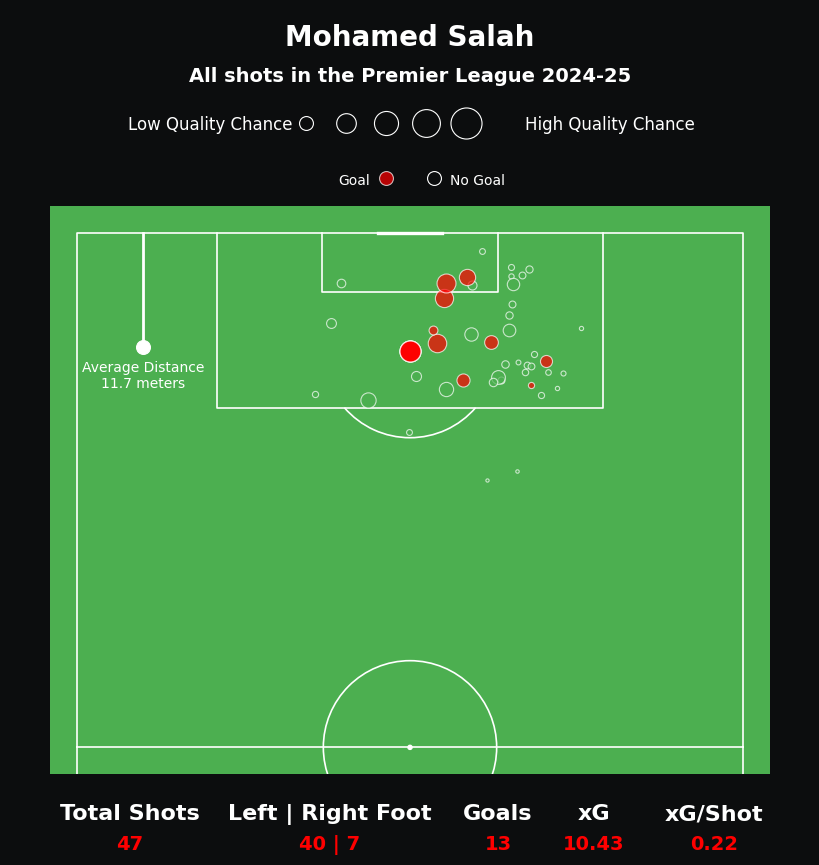

In [8]:
# create a figure
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)  # set figure background color

# add title and descriptive text (top section)
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# title and description
ax1.text(x=0.5, y=0.85, s='Mohamed Salah', fontsize=20, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.7, s='All shots in the Premier League 2024-25', fontsize=14, fontweight='bold', color='white', ha='center')
ax1.text(x=0.25, y=0.5, s='Low Quality Chance', fontsize=12, color='white', ha='center')

# quality markers
for i, size in enumerate([100, 200, 300, 400, 500]):
    ax1.scatter(x=0.37 + (i * 0.05), y=0.53, s=size, color=background_color, edgecolor='white', linewidth=0.8)

ax1.text(x=0.75, y=0.5, s='High Quality Chance', fontsize=12, color='white', ha='center')

# Goal/No Goal markers
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=10, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.scatter(x=0.53, y=0.3, s=100, color=background_color, edgecolor='white', linewidth=0.8)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=10, color='white', ha='left')

ax1.set_axis_off()  # turn off axes for a cleaner look

# middle section: add the football pitch
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])  # position the pitch
pitch.draw(ax=ax2)  # draw the pitch with specified pitch color

# highlight the average shot distance
ax2.scatter(x=90, y=points_average_distance, s=100, color='white', linewidth=0.8)
ax2.plot([90, 90], [100, points_average_distance], color='white', linewidth=2)
ax2.text(
    x=90, y=points_average_distance - 4,
    s=f'Average Distance\n{actual_average_distance:.1f} meters',
    fontsize=10, color='white', ha='center'
)

# plot individual shots
for shot in df.to_dict(orient='records'):
    pitch.scatter(
        shot['X'], shot['Y'], s=300 * shot['xG'],
        color='red' if shot['result'] == 'Goal' else football_pitch_background,
        ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white'
    )

# bottom section: add statistics
ax3 = fig.add_axes([0, 0.2, 1, 0.05])  # position the stats section
ax3.set_facecolor(background_color)  # match background color
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# add statistics text
stats = [
    (0.15, 'Total Shots', total_shots),
    (0.40, 'Left | Right Foot', f'{leftfoot_total_shots} | {rightfoot_total_shots}'),
    (0.61, 'Goals', total_goals),
    (0.73, 'xG', f'{total_xG:.2f}'),
    (0.88, 'xG/Shot', f'{xG_per_shot:.2f}')
]
for x, label, value in stats:
    ax3.text(x=x, y=0.5, s=label, fontsize=16, fontweight='bold', color='white', ha='center')
    ax3.text(x=x, y=0, s=f'{value}', fontsize=14, fontweight='bold', color='red', ha='center')

ax3.set_axis_off()  # turn off axes for the stats section

In [9]:
# save the figure to a file
fig.savefig('Mohamed Salah 2024.png', facecolor=background_color, bbox_inches='tight')